In [330]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [1]:
# Import packages
import sys
import os
import numpy as np
import pandas as pd
from scipy.stats import mode 
import matplotlib.pyplot as plt
import seaborn as sns
 # code starts here
from scipy import stats
from scipy.stats import kurtosis 
from sklearn.linear_model import LinearRegression
import datetime as dt
import re
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree  import ExtraTreeRegressor
from sklearn.tree  import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree  import ExtraTreeClassifier
from sklearn.tree  import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from itertools import product
from datetime import datetime
from sklearn import tree
import statsmodels.api as sm 

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from IPython.display import Image
import pydotplus
np.set_printoptions(250) 
# import sklearn.external.joblib as extjoblib
# import joblib
import seaborn as sns

## 1. Read Data in a dataframe

In [33]:
import statsmodels.api as sm

# Read and Peak at Data
base_datapath = r"D://Projects//Python//Jupyter//Anands Notebook//Captstone//Data//Mahindra First Choice Dataset//"
cleansed_datapath = r"D://Projects//Python//Jupyter//Anands Notebook//Captstone//Data//Cleansed DataSet//"
customer_cleansed_datapath = cleansed_datapath + "Customer_Data.xlsx"
invoice_datapath = base_datapath + "Final_invoice.csv"
jtd_datapath = cleansed_datapath + "JTD.csv"
plantmaster_datapath = cleansed_datapath + "Plant Master.xlsx"


cleansed_invoice_datapath = cleansed_datapath + "Final_invoice.csv"
cleansed_invoice_revised_datapath = cleansed_datapath + "Final_invoice_revised.csv"

cleansed_CLTV_datapath = cleansed_datapath +"CLTV.csv"

dir_of_interest = 'D://Projects//Python//GeneralFunctions'
sys.path.append(dir_of_interest)   
from EDA import *
#import EDA

In [34]:
dfCustomer = pd.read_csv(cleansed_CLTV_datapath)

#dfInvoice = pd.read_excel(invoice_datapath,sheet_name="Sheet1")

In [35]:
dfCustomer.head()

,Customer No.,Make-Model,Average Value,Total Transactions,Min Invoice Date,Total Years From First Transaction,Max Invoice Date,Purchase Frequency,KMs Reading,Life Span,CLTV
0,107626,MAHINDRA & MAHINDRASCORPIO CRDE,89739.494000,5,13/11/2015,0.083333,31/10/2015,60.0,15350,15.387500,8.285199e+07
1,121624,MAHINDRA & MAHINDRAXYLO,419840.660000,1,30/11/2015,0.083333,30/11/2015,12.0,28158,14.320167,7.214626e+07
2,66748,MAHINDRA & MAHINDRAXUV 500,165613.386667,3,19/11/2014,0.083333,31/12/2014,36.0,59391,11.717417,6.986020e+07
3,102396,TATA MOTORSINDICA,133902.705000,2,27/11/2015,0.083333,29/06/2015,24.0,22045,14.829583,4.765731e+07
4,71429,GENERAL MOTORSTAVERA,148927.775000,2,29/11/2014,0.083333,30/10/2014,24.0,65850,11.179167,3.995732e+07


## 2. Create Model and predict CLTV with Make-Model, Average Value, Kms Reading

In [42]:
dfCustomerCopy = dfCustomer.copy()

In [43]:
dfCustomerCopy["Make-Model"].unique().size

247

In [44]:
dfCustomerCopy.drop(["Customer No.","Max Invoice Date","Min Invoice Date"],inplace=True,axis=1)
dfCustomerCopy.head()

,Make-Model,Average Value,Total Transactions,Total Years From First Transaction,Purchase Frequency,KMs Reading,Life Span,CLTV
0,MAHINDRA & MAHINDRASCORPIO CRDE,89739.494000,5,0.083333,60.0,15350,15.387500,8.285199e+07
1,MAHINDRA & MAHINDRAXYLO,419840.660000,1,0.083333,12.0,28158,14.320167,7.214626e+07
2,MAHINDRA & MAHINDRAXUV 500,165613.386667,3,0.083333,36.0,59391,11.717417,6.986020e+07
3,TATA MOTORSINDICA,133902.705000,2,0.083333,24.0,22045,14.829583,4.765731e+07
4,GENERAL MOTORSTAVERA,148927.775000,2,0.083333,24.0,65850,11.179167,3.995732e+07


In [45]:
dfCustomerCopy = applyCustomEncodingToDataFrame(dfCustomerCopy,["Make-Model"],'',75)

In [46]:
dfCustomerCopy["Make-Model"].unique().size

76

In [47]:
dfCustomerCopy.head()

,Make-Model,Average Value,Total Transactions,Total Years From First Transaction,Purchase Frequency,KMs Reading,Life Span,CLTV
0,MAHINDRA & MAHINDRASCORPIO CRDE,89739.494000,5,0.083333,60.0,15350,15.387500,8.285199e+07
1,MAHINDRA & MAHINDRAXYLO,419840.660000,1,0.083333,12.0,28158,14.320167,7.214626e+07
2,MAHINDRA & MAHINDRAXUV 500,165613.386667,3,0.083333,36.0,59391,11.717417,6.986020e+07
3,TATA MOTORSINDICA,133902.705000,2,0.083333,24.0,22045,14.829583,4.765731e+07
4,GENERAL MOTORSTAVERA,148927.775000,2,0.083333,24.0,65850,11.179167,3.995732e+07


In [48]:
dfCustomerCopy= applyOneHotEncodingToDataFrame(dfCustomerCopy,["Make-Model"])   

In [49]:
dfCustomerCopy.head()

,Average Value,Total Transactions,Total Years From First Transaction,Purchase Frequency,KMs Reading,Life Span,CLTV,Make-Model_FIATLINEA,Make-Model_FIATPALIO,Make-Model_FORDECOSPORT,...,Make-Model_TATA MOTORSSAFARI,Make-Model_TATA MOTORSSUMO,Make-Model_TATA MOTORSVISTA,Make-Model_TOYOTACOROLLA,Make-Model_TOYOTAETIOS,Make-Model_TOYOTAFORTUNER,Make-Model_TOYOTAINNOVA,Make-Model_TOYOTAQUALIS,Make-Model_VOLKSWAGENPOLO,Make-Model_VOLKSWAGENVENTO
0,89739.494000,5,0.083333,60.0,15350,15.387500,8.285199e+07,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,419840.660000,1,0.083333,12.0,28158,14.320167,7.214626e+07,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,165613.386667,3,0.083333,36.0,59391,11.717417,6.986020e+07,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,133902.705000,2,0.083333,24.0,22045,14.829583,4.765731e+07,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,148927.775000,2,0.083333,24.0,65850,11.179167,3.995732e+07,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Linear Regression


D:\Visual Studio\Anaconda3_64\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
D:\Visual Studio\Anaconda3_64\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
D:\Visual Studio\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1617: RuntimeWarning: invalid value encountered in sign
  term2 = np.sign(denom) * np.where(denom == 0.0, np.nan,
D:\Visual Studio\Anaconda3_64\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\Visual Studio\Anaconda3_64\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
D://Projects//Python//GeneralFunctions\EDA.py:1126: MatplotlibDeprecationWarning: Adding an axes using the same argu

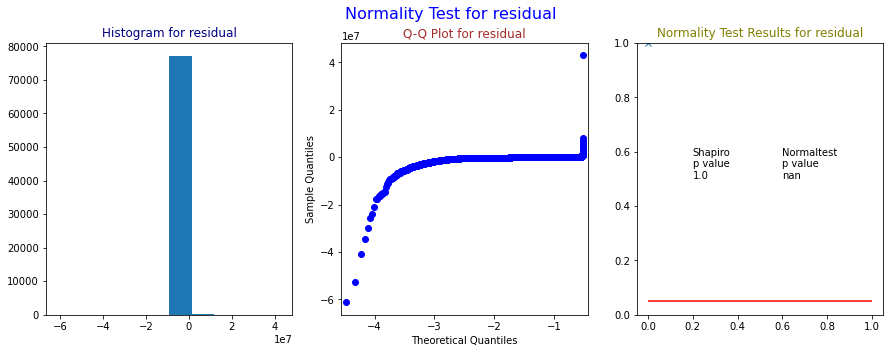

Random Forest Regressor
Descision Tree Regressor
Extra Tree Regressor
Gradient Boosting Regressor


In [51]:
x=dfCustomerCopy.drop(['CLTV'],axis=1)
y=dfCustomerCopy['CLTV']
resultList = runAlgoRegressor(x,y)



In [52]:
resultList

,Name,RMSE,R Square Score
0,Linear Regression,578055.583078,0.361568
1,Random Forest Regressor,247536.898164,0.882927
2,Descision Tree Regressor,248912.790916,0.881622
3,Extra Tree Regressor,270326.881442,0.860378
4,Gradient Boosting Regressor,237422.653388,0.892299


## 3. Insights of Average CLTV based on  various attirbutes

In [174]:
averageTotalCLTV = dfCustomerCopy["CLTV"].sum()
CLTVBasedOnCITY = (dfCustomerCopy.groupby(['CITY'])[['CLTV']].sum().reset_index().sort_values("CLTV", ascending=False).set_index("CITY"))/averageTotalCLTV*100
CLTVBasedOnCITY.head()

,CLTV
CITY,
chennai,16.034965
pune,6.297111
hyderabad,5.961207
bangalore,3.551453
nashik,3.473425


In [129]:
dfCustomerCopy = dfCustomer.copy()

dfInvoice = pd.read_csv(cleansed_invoice_datapath)


D:\Visual Studio\Anaconda3_64\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (9,10,14,15,21,41,51) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [130]:
dfCustomerCopy.shape

(258425, 11)

In [131]:
dfInvoiceCopy =dfInvoice[["Customer No.",'Make-Model',"CITY","District","Cust Type","Order Type","Plant Name1"]]

In [132]:
dfInvoiceCopy.shape

(492314, 7)

In [133]:
dfCustomerCopy = pd.merge(dfCustomerCopy, dfInvoiceCopy , on=["Customer No.","Make-Model"],how='left')#.rename(columns = {"Total Value":"Average Value"})

In [134]:
dfCustomerCopy.shape

(490789, 16)

In [135]:
dfCustomerCopy = dfCustomerCopy.drop_duplicates()

In [136]:
dfCustomerCopy.head()

,Customer No.,Make-Model,Average Value,Total Transactions,Min Invoice Date,Total Years From First Transaction,Max Invoice Date,Purchase Frequency,KMs Reading,Life Span,CLTV,CITY,District,Cust Type,Order Type,Plant Name1
0,107626,MAHINDRA & MAHINDRASCORPIO CRDE,89739.494000,5,13/11/2015,0.083333,31/10/2015,60.0,15350,15.387500,8.285199e+07,dharmapuri,Tamil Nadu,Retail,Accidental,X032 - SBBS MOTORS
4,107626,MAHINDRA & MAHINDRASCORPIO CRDE,89739.494000,5,13/11/2015,0.083333,31/10/2015,60.0,15350,15.387500,8.285199e+07,dharmapuri,Tamil Nadu,Retail,Running Repairs,X032 - SBBS MOTORS
5,121624,MAHINDRA & MAHINDRAXYLO,419840.660000,1,30/11/2015,0.083333,30/11/2015,12.0,28158,14.320167,7.214626e+07,sas nager mohali,Punjab,Retail,Accidental,SAS NAGAR - MOHALI
6,66748,MAHINDRA & MAHINDRAXUV 500,165613.386667,3,19/11/2014,0.083333,31/12/2014,36.0,59391,11.717417,6.986020e+07,raigad,Maharashtra,Retail,Accidental,NERUL - NAVI MUMBAI
8,66748,MAHINDRA & MAHINDRAXUV 500,165613.386667,3,19/11/2014,0.083333,31/12/2014,36.0,59391,11.717417,6.986020e+07,raigad,Maharashtra,Retail,Running Repairs,NERUL - NAVI MUMBAI


## 3.1 Average CLTV Based on CITY

<Figure size 504x504 with 0 Axes>

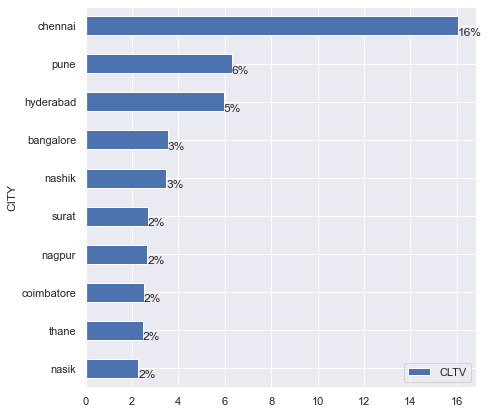

In [202]:
averageTotalCLTV = dfCustomerCopy["CLTV"].sum()
CLTVBasedOnCITY = (dfCustomerCopy.groupby(['CITY'])[['CLTV']].sum().reset_index().sort_values("CLTV", ascending=False).set_index("CITY"))/averageTotalCLTV*100

figure = plt.figure(figsize=(7,7))
ax = CLTVBasedOnCITY[:10][::-1].plot(kind="barh" ,figsize=(7,7))
for p in ax.patches:
    x,y = p.get_x(), p.get_y()
    h,w = p.get_height(), p.get_width()
    ax.annotate(str(int(w))+ "%",(x+w,y))
plt.show()


## 3.2 Average CLTV Based on State

<Figure size 360x360 with 0 Axes>

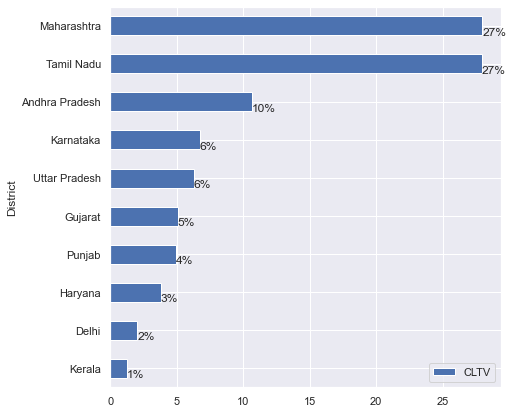

In [203]:
averageTotalCLTV = dfCustomerCopy["CLTV"].sum()
CLTVBasedOnDistrict = (dfCustomerCopy.groupby(['District'])[['CLTV']].sum().reset_index().sort_values("CLTV", ascending=False).set_index("District"))/averageTotalCLTV*100
figure = plt.figure(figsize=(5,5))
ax = CLTVBasedOnDistrict[:10][::-1].plot(kind="barh",figsize=(7,7))
for p in ax.patches:
    x,y = p.get_x(), p.get_y()
    h,w = p.get_height(), p.get_width()
    ax.annotate(str(int(w))+ "%",(x+w,y))
plt.show()

## 3.3 Average CLTV based on Cust Type

<Figure size 360x360 with 0 Axes>

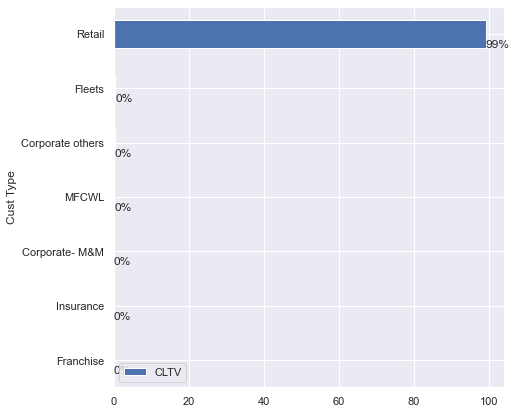

In [204]:
##"Cust Type","Order Type","Plant Name1"

CLTVBasedOnCustType = (dfCustomerCopy.groupby(['Cust Type'])[['CLTV']].sum().reset_index().sort_values("CLTV", ascending=False).set_index("Cust Type"))/averageTotalCLTV*100
figure = plt.figure(figsize=(5,5))
ax = CLTVBasedOnCustType[:10][::-1].plot(kind="barh",figsize=(7,7))
for p in ax.patches:
    x,y = p.get_x(), p.get_y()
    h,w = p.get_height(), p.get_width()
    ax.annotate(str(int(w))+ "%",(x+w,y))
plt.show()

## 3.4 Average CLTV based on Plant Name

In [ ]:
dfCustomerCopy[dfCustomerCopy["Plant Name1"].isnull()==True]

In [191]:
dfCustomerCopy["Plant Name1"].value_counts()

NASHIK                            16511
MADEENAGUDA                        9223
GUINDY                             8496
NAGPUR                             8141
NERKUNDRAM                         7950
                                  ...  
X432 - HARSH AUTOMOBILES             11
X339 - OSL AUTOCAR PRIVATE LIM        7
X359 - STAR AUTOMOBILES               5
X206 - SHRI SAI SHAKTI SERVICE        2
X211 -  M/S KAMAL MOTORS              1
Name: Plant Name1, Length: 244, dtype: int64

<Figure size 360x360 with 0 Axes>

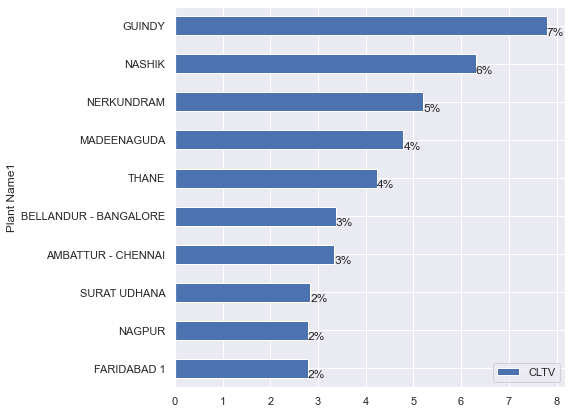

In [205]:
##"Cust Type","Order Type","Plant Name1"

CLTVBasedOnPlantName = (dfCustomerCopy.groupby(["Plant Name1"])[['CLTV']].sum().reset_index().sort_values("CLTV", ascending=False).set_index("Plant Name1"))/averageTotalCLTV*100
figure = plt.figure(figsize=(5,5))
ax = CLTVBasedOnPlantName[:10][::-1].plot(kind="barh",figsize=(7,7))
for p in ax.patches:
    x,y = p.get_x(), p.get_y()
    h,w = p.get_height(), p.get_width()
    ax.annotate(str(int(w))+ "%",(x+w,y))
plt.show()

## 3.5 Average CLTV based on Order Type

In [ ]:
dfCustomerCopy["Order Type"].value_counts()

<Figure size 360x360 with 0 Axes>

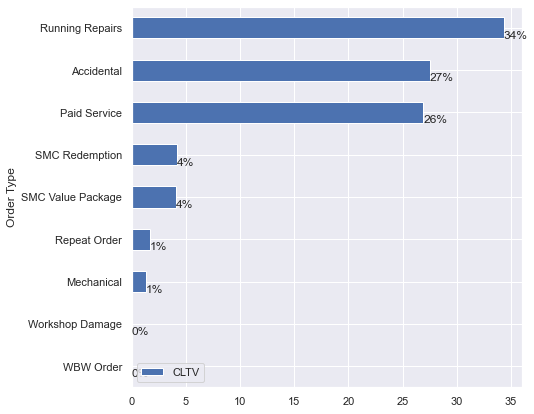

In [206]:
##"Cust Type","Order Type","Plant Name1"

CLTVBasedOnOrderType = (dfCustomerCopy.groupby(["Order Type"])[['CLTV']].sum().reset_index().sort_values("CLTV", ascending=False).set_index("Order Type"))/averageTotalCLTV*100
figure = plt.figure(figsize=(5,5))
ax = CLTVBasedOnOrderType[:10][::-1].plot(kind="barh",figsize=(7,7))
for p in ax.patches:
    x,y = p.get_x(), p.get_y()
    h,w = p.get_height(), p.get_width()
    ax.annotate(str(int(w))+ "%",(x+w,y))
plt.show()

In [124]:
dfCustomerTemp.head()

,CITY,CLTV
0,# 255 railway colony kalka,0.00000
1,#name?,0.00000
2,'+,82810.79004
3,'-,0.00000
4,'--,0.00000


In [103]:
dfCustomerTemp[dfCustomerTemp["CITY"]>1]

,Customer No.,Make-Model,CITY
417,100376,MARUTI SUZUKIZEN ESTILO,2
3193,102914,HYUNDAISANTRO,2
3534,103230,TATA MOTORSSUMO,2
3765,103441,HYUNDAII10,2
4539,104162,RENAULTDUSTER,2
...,...,...,...
251263,97412,MARUTI SUZUKISX4,2
258255,MFCCM03,MAHINDRA & MAHINDRABOLERO,2
258256,MFCCM03,MAHINDRA & MAHINDRABOLERO PIK UP,2
258257,MFCCM03,MAHINDRA & MAHINDRASCORPIO CRDE,2


In [105]:
dfCustomerCopy[dfCustomerCopy["Customer No."]=="102914"]

,Customer No.,Make-Model,Average Value,Total Transactions,Min Invoice Date,Total Years From First Transaction,Max Invoice Date,Purchase Frequency,KMs Reading,Life Span,CLTV,CITY
109891,102914,HYUNDAISANTRO,2220.51,5,06/05/2015,0.5,23/05/2015,10.0,69454,10.878833,241565.58205,coimbatore
109894,102914,HYUNDAISANTRO,2220.51,5,06/05/2015,0.5,23/05/2015,10.0,69454,10.878833,241565.58205,chennai


In [ ]:
## Deleting the records which have 2 CITIES and keeping only 1.

In [ ]:


X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=0.6,random_state=5)
rfc=RandomForestClassifier()
rfc.fit(X_train, y_train)    # model fitting
y_pred = rfc.predict(X_test)   # Predictions
from sklearn import metrics